## Assignment 0 ANLY590

## Zhen Zhong 

### 1.1 

### (1.1.1) Create a visualization of the coefficient trajectories

In [4]:
#Import the package
# import necessary functions
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error


#Download the csv and clean all empty data
hitter = pd.read_csv("Hitters.csv").dropna()

#Set up the y train and x train 
y = hitter.Salary
#Remove all catorgories data 
X = hitter.drop(['Salary', 'Unnamed: 0','League', 'Division', 'NewLeague'], axis=1).astype('float64')
colname=X.columns
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
AtBat      263 non-null float64
Hits       263 non-null float64
HmRun      263 non-null float64
Runs       263 non-null float64
RBI        263 non-null float64
Walks      263 non-null float64
Years      263 non-null float64
CAtBat     263 non-null float64
CHits      263 non-null float64
CHmRun     263 non-null float64
CRuns      263 non-null float64
CRBI       263 non-null float64
CWalks     263 non-null float64
PutOuts    263 non-null float64
Assists    263 non-null float64
Errors     263 non-null float64
dtypes: float64(16)
memory usage: 34.9 KB


C:\Users\Zhen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


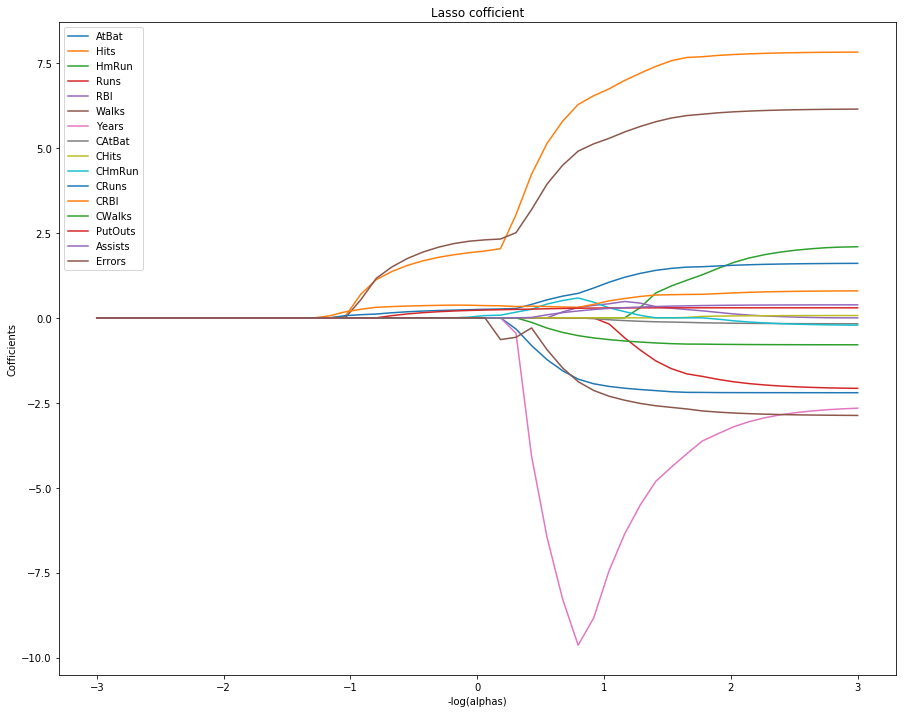

In [5]:
#Fit a Set of Lasso Models and fit Lasso models with various alpha
alphas = 10**np.linspace(4,-2,50)*0.1
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
#Plot Lasso tuning parameter alpha
plt.figure(figsize=(15,12))
alphas=-np.log10(alphas)
plt.plot(alphas,coefs)
plt.xlabel('-log(alphas)')
plt.ylabel('Cofficients')
plt.legend(colname)
plt.title('Lasso cofficient')
plt.axis('tight')
plt.show()


### (1.1.2) Comment on which are the final three predictors that remain in the model

From the plot above, we can see that Hits, CRBI, Walks, CRuns and AtBat are possible five remain predictors in the model since some of colors of the predictors are similar and hard to distinguish. In order to find out the three remaining predictors, we will check the predictor when alpha is 10 as a restriction since we can see that there are three predictors left when -log(alpha) is -1. 

In [6]:
lasso1=Lasso(max_iter=10000, normalize=True)
coef=lasso1.set_params(alpha=10**(1)).fit(X, y).coef_
colname[abs(coef)!=0]


Index(['Hits', 'CRuns', 'CRBI'], dtype='object')

Therefore, Hits, CRuns and CRBI are three remaining predictors. 

### (1.1.3) Use cross-validation to find the optimal value of the regularization penalty

In [7]:
# Use the cross-validation package to split data into training and test sets
# Set the test size
X_train, X_test , y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5,random_state=1)
lassocv = LassoCV(alphas=None,cv=20, max_iter=10000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Optimal Alpha Penalty=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))


Optimal Alpha Penalty= 2.0899833837573794
mse =  111174.10781854091


### (1.1.4) How many predictors are left in that model?

In [8]:
print("model coefficients:")
pd.Series(lasso.coef_, index=X.columns)

model coefficients:


AtBat     -0.000000
Hits       0.972492
HmRun      0.000000
Runs       0.000000
RBI        0.384810
Walks      2.797144
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.282777
CRuns      0.000000
CRBI       0.492719
CWalks     0.000000
PutOuts    0.398592
Assists    0.000000
Errors    -0.000000
dtype: float64

We can see that 10 of 16 predictors are approach to 0, which means that there are still 6 predictor remaining. 

### 1.2 

### (1.2.1) Visualize the coefficient trajectories 

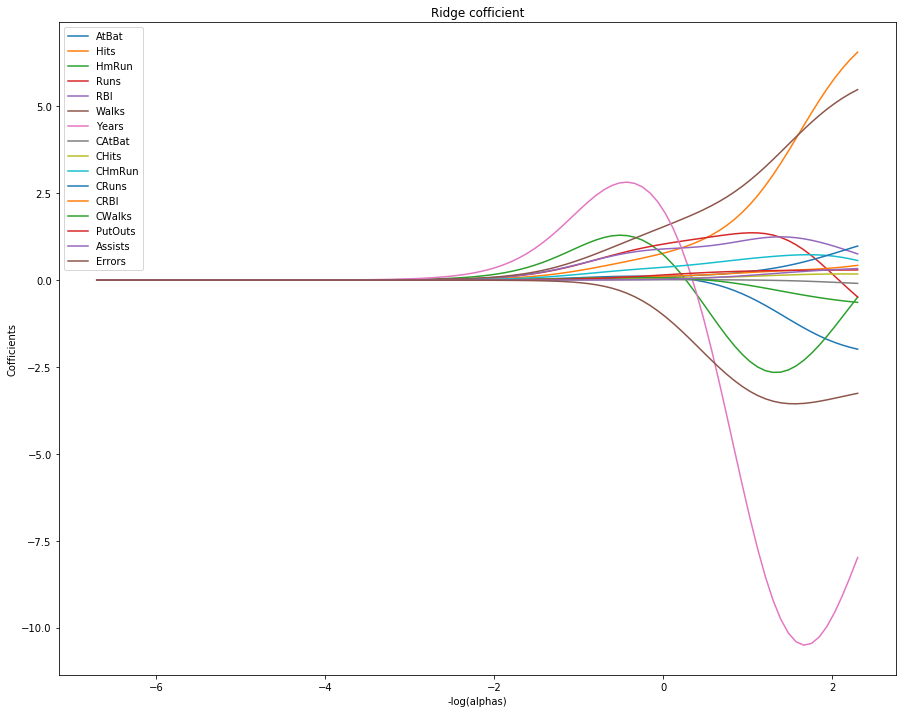

In [9]:
alphas = 10**np.linspace(7,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
#Plot Ridge tuning parameter alpha
plt.figure(figsize=(15,12))
alphas=-np.log10(alphas)
plt.plot(alphas,coefs)
plt.xlabel('-log(alphas)')
plt.ylabel('Cofficients')
plt.legend(colname)
plt.title('Ridge cofficient')
plt.axis('tight')
plt.show()


### (1.2.2) Use cross-validation to find the optimal value of the regularization penalty 

In [10]:

ridgecv = RidgeCV(cv=20, scoring = 'neg_mean_squared_error',normalize=True)
ridgecv.fit(X_train, y_train)
ridge.set_params(alpha=ridgecv.alpha_)
print("Optimal Alpha Penalty:", ridgecv.alpha_)
ridge.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, ridge.predict(X_test)))


Optimal Alpha Penalty: 1.0
mse =  103710.94178631302


In [11]:
print("model coefficients:")
pd.Series(ridge.coef_, index=X.columns)

model coefficients:


AtBat      0.045991
Hits       0.692516
HmRun      0.653649
Runs       0.755135
RBI        1.256455
Walks      1.696205
Years      1.933840
CAtBat     0.008451
CHits      0.047159
CHmRun     0.424809
CRuns      0.097473
CRBI       0.107822
CWalks     0.104665
PutOuts    0.237132
Assists    0.001033
Errors     0.398092
dtype: float64

### 2. Short Answer 

### (2.1) Explain in your own words the bias-variance tradeoff 

When we try to build the model to fit the data, if our prediction from this model is closer to the target value in training, the bias where is gap between predicted value and target value is small will decrease. However, we also increase the complexity of this model, which leads to a increasing variance since the model becomes more fit and sensentive to the sample and target value. On the contrary, if the variance of the model is small, the model will be less sensitive and complexity to the samples and the target value leading to the prediction closer to correct values and increasing bias.Overall, bias increases when variance decreases and model is less complexity while variance increases when bias decreases and the complexity of model increases. Therefore, in order to build the best model, we need to find a optimal point between bias and variance. 

### (2.2) What role does regularization play in this tradeoff? 

Regularization is the technique to determine a optimal point between bias and variances by setting up the penalty to control the complexity of model and prevent overfitting. 

### (2.3) Make reference to your findings in number (1) to describe models of high/low bias and variance

Lasso regression uses L1 regularization technique and adds absolute value of magnitude of coefficient as penalty. Our goal is to minimize the absolute value of magnitude. If the penalty increases, absolute value of magnitude of cofficient will shrink and leads to the unferfit which causes the variance decreases while bias increase. On the other hand, if penalty decreases, the variances will increase while bias decreases. In this case, Lasso shrinks the less important feature’s coefficient to zero thus removing some features. Lasso regression works very well when there are a huge amount of features. 

Ridge regression uses L2 regularization technique and adds squared magnitude of coefficient as penalty.Our goal is to minize the square magnitude of cofficeint. If the penalty increase, it will add too much weight and cause the model underfit which leads to decreasing variance while bias increase.On the other hand, if penalty decreases, the variances will increase while bias decreases. This technnique works well to prevent over-fitting. 